# A Dataproject About Tennis Men's Professionals Matches
## 1.0 Content
### 1.1 Import of all packages
First we do a import of all the packages so we can use all the functions

In [1]:
%matplotlib inline
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import geopandas
import geoplot
import geoplot.crs as gcrs
import math
import sqlite3
import datetime as dt
import sqlalchemy
from numpy.random import random
from sqlalchemy import create_engine
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

### 1.2 A short description of the dataset

Our dataproject are based on a dataset of men's tennis ATP matches which consist of various variables on individual statistics. Some of the variables can be knowed from the title whereas the below variables are described as:

ace = absolute number of aces
df = number of double faults
svpt = total serve points
1stin = 1st serve in
1st won = points won on 1st serve
2ndwon = points won on 2nd serve
SvGms = serve games
bpSaved = break point saved
bpFaced = break point faced

## 2.1 Importing the data

First of all, we import the dataset below. Moreover, as we can see from the code, we are defining some of the variables as strings because otherwise python import them as integers

In [53]:
DATAPATH = "Dataset/atp-matches-dataset/"

data = []

for i in range(2000, 2016):
    data.append(pd.read_csv(DATAPATH + "atp_matches_" + str(i) + ".csv", dtype={"winner_hand": str,"tourney_id": str,"tourney_date": str}))

data_tennis = pd.concat(data)

data_tennis.head()


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,...,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,...,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,...,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,...,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,...,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0


### 2.2 Constructing a subset
We are constructing a subset of the raw tennis dataset such that we can use it for our analysis. We assign all the variables from the master dataset with new names. Moreover, we slize the Dataframe by writing all the columns that we want to keep in the knew subset and assigning this to the knew variable "Tennis_subset"

In [99]:
# We are assigning all variables with a new name
data_tennis.columns = ['Tourney_id','Tourney_name','Surface','Draw_size','Tourney_level','Date',
                      'Match_number','Winner_id', 'Winner_seed', 'Winner_entry',
       'Winner_name', 'Winner_hand', 'Winner_hight', 'Winner_country', 'Winner_age',
       'Winner_rank', 'Winner_rank_points', 'Loser_id', 'Loser_seed',
       'Loser_entry', 'Loser_name', 'Loser_hand', 'Loser_hight', 'Loser_country',
       'Loser_age', 'Loser_rank', 'Loser_rank_points', 'Match_score', 'best_of',
       'round', 'minutes', 'Winner_aces', 'Winner_double_faults', 'Winner_serve_points', 'Winner_1st_serve_in', 'Winner_1st_serve_won',
       'Winner_2nd_serve_won', 'Winner_serve_games_played', 'Winner_break_points_saved', 'Winner_break_points_faced', 'Loser_aces', 'Loser_double_faults','Loser_serve_points', 'Loser_1st_serve_in', 'Loser_1st_serve_won', 'Loser_2nd_serve_won', 'Loser_serve_games_played', 'Loser_break_points_saved',
       'Loser_break_points_faced']
# we are indexing the master dataset and assigning it a new name: "Tennis_subset"
Tennis_subset = data_tennis.loc[:,['Tourney_name', 'Surface', 'Draw_size', 'Tourney_level', 'Date', 'Winner_id', 'Winner_seed',
       'Winner_name', 'Winner_hand', 'Winner_hight', 'Winner_country', 'Winner_age',
       'Winner_rank', 'Loser_id', 'Loser_seed',
       'Loser_entry', 'Loser_name', 'Loser_hand', 'Loser_hight', 'Loser_country',
       'Loser_age', 'Loser_rank','minutes', 'Winner_aces', 'Winner_double_faults', 'Winner_serve_points', 'Winner_1st_serve_in', 'Winner_1st_serve_won',
       'Winner_2nd_serve_won', 'Winner_serve_games_played', 'Winner_break_points_saved', 'Winner_break_points_faced', 'Loser_aces', 'Loser_double_faults','Loser_serve_points', 'Loser_1st_serve_in', 'Loser_1st_serve_won', 'Loser_2nd_serve_won', 'Loser_serve_games_played', 'Loser_break_points_saved',
       'Loser_break_points_faced']]

Tennis_subset.tail()


,Tourney_name,Surface,Draw_size,Tourney_level,Date,Winner_id,Winner_seed,Winner_name,Winner_hand,Winner_hight,...,Winner_break_points_faced,Loser_aces,Loser_double_faults,Loser_serve_points,Loser_1st_serve_in,Loser_1st_serve_won,Loser_2nd_serve_won,Loser_serve_games_played,Loser_break_points_saved,Loser_break_points_faced
2610,Roland Garros,Clay,128,G,20150524,104542,14.0,Jo Wilfried Tsonga,R,188.0,...,7.0,5.0,6.0,160.0,106.0,71.0,23.0,22.0,13.0,19.0
2611,Roland Garros,Clay,128,G,20150524,104527,8.0,Stanislas Wawrinka,R,183.0,...,4.0,7.0,0.0,112.0,71.0,48.0,23.0,16.0,5.0,8.0
2612,Roland Garros,Clay,128,G,20150524,104925,1.0,Novak Djokovic,R,188.0,...,4.0,12.0,1.0,149.0,98.0,63.0,28.0,24.0,13.0,19.0
2613,Roland Garros,Clay,128,G,20150524,104527,8.0,Stanislas Wawrinka,R,183.0,...,17.0,8.0,2.0,147.0,102.0,73.0,25.0,21.0,12.0,15.0
2614,Roland Garros,Clay,128,G,20150524,104527,8.0,Stanislas Wawrinka,R,183.0,...,10.0,6.0,0.0,128.0,83.0,52.0,24.0,19.0,11.0,15.0


## 3.1 Descriptive analysis of the Tennis_subset

### Statistical description 

We start by giving a short description of the Tennis_subset. The subset consist of some variables that do not make sence to describe, why we excluded this variables for this short description. The variables that are excluded will be used in the regression en the next section

For the statistical description we use the pandas describe function and thereafter making a table  

In [124]:
# description of the subset exclude=[object]




KeyError: "['Tourney_name' 'Surface' 'Draw_size' 'Tourney_level' 'Winner_id'\n 'Winner_seed' 'Winner_name' 'Winner_hand' 'Winner_country' 'Loser_id'\n 'Loser_seed' 'Loser_entry' 'Loser_name' 'Loser_hand' 'Loser_country'\n 'Loser_rank' 'Winner_serve_points' 'Winner_1st_serve_in'\n 'Winner_1st_serve_won' 'Winner_2nd_serve_won' 'Winner_serve_games_played'\n 'Winner_break_points_saved' 'Winner_break_points_faced'\n 'Loser_serve_points' 'Loser_1st_serve_in' 'Loser_1st_serve_won'\n 'Loser_2nd_serve_won' 'Loser_serve_games_played'\n 'Loser_break_points_saved' 'Loser_break_points_faced'] not found in axis"

In [61]:
Tennis_subset.loc[Tennis_subset['Date'] > 2015000, :]

TypeError: '>' not supported between instances of 'str' and 'int'

In [20]:
most_wins = Tennis_subset.groupby('Winner_country').agg({'Winner_id':'count'}).fillna(0).sort_values(['Winner_id'], ascending=False).reset_index()

# Download new world map
import io
import requests
import shutil
import zipfile
if os.path.exists("Dataset/map"):
    shutil.rmtree("Dataset/map")
    os.mkdir("Dataset/map")
    
# get world shapefile with country borders
world = requests.get('http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip')
world_zip = zipfile.ZipFile(io.BytesIO(world.content))
zipfile.ZipFile.namelist(world_zip)
world_zip.extractall("Dataset/map")
world_map = geopandas.read_file('TM_WORLD_BORDERS-0.3.shp')

In [6]:
path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
#df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']
#dfs = Tennis_subset.groupby('Winner_country').agg({'Winner_id':'count'}).fillna(0).sort_values(['Winner_id'], ascending=False)

#boroughs = geopandas.read_file(geopandas.datasets.get_path('nybb')).to_crs(epsg='4326')
#injurious_collisions = geopandas.read_file("https://github.com/ResidentMario/geoplot-data/raw/master/nyc-injurious-collisions.geojson")

#geoplot.choropleth(df, hue=dfs, cmap='Pastel2', legend=True, figsize=(8, 4))
#plt.title("Percentage White Residents, 2000")

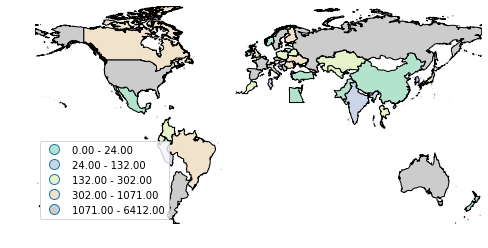

In [27]:
# Merge geodata with most wins and plot
df_plot = world_map[['ISO3', 'NAME', 'geometry']].merge(most_wins.rename(columns={'Winner_country': 'ISO3'})).rename(columns={'Winner_id': 'wins'})
geoplot.choropleth(df_plot, hue='wins', cmap='Pastel2', legend=True, figsize=(8, 4))